In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('/content/sample_data/pulsar_stars.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
x = dataset.iloc[:, [4,0]]
y = dataset.iloc[:, -1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train, x_test, y_train, y_test

(        Mean of the DM-SNR curve   Mean of the integrated profile
 3055                    8.048495                       120.640625
 10138                   3.041806                       116.554688
 3600                   73.643813                        66.773438
 16245                   3.780936                        93.312500
 6079                    1.701505                        99.343750
 ...                          ...                              ...
 9225                    3.966555                        68.125000
 13123                   0.821906                       131.953125
 9845                    1.370401                       133.164062
 10799                   2.223244                        98.171875
 2732                    3.122910                       106.046875
 
 [14318 rows x 2 columns],
         Mean of the DM-SNR curve   Mean of the integrated profile
 5965                    2.270067                       102.289062
 17707                   3.333612

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel="linear", random_state=0)
classifier.fit(x_train,y_train)
SVC(kernel='linear', random_state=0)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[3290,   16],
       [  91,  183]])

<ipython-input-11-745f31767b49>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


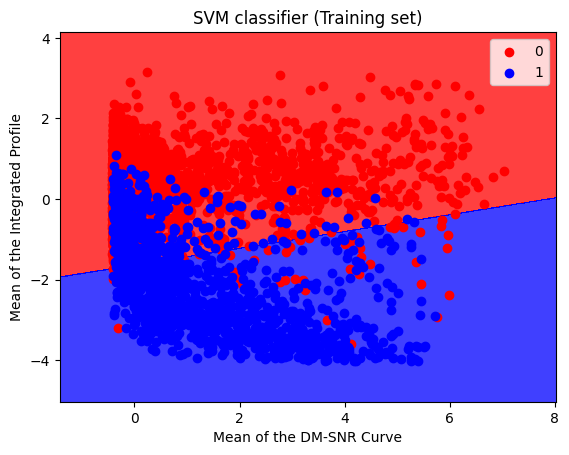

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'classifier' is your SVM classifier already trained

# Plot decision boundaries
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)

# Set plot labels and legend
plt.title('SVM classifier (Training set)')
plt.xlabel('Mean of the DM-SNR Curve')
plt.ylabel('Mean of the Integrated Profile')
plt.legend()

# Show the plot
plt.show()

<ipython-input-12-c0549afa3438>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


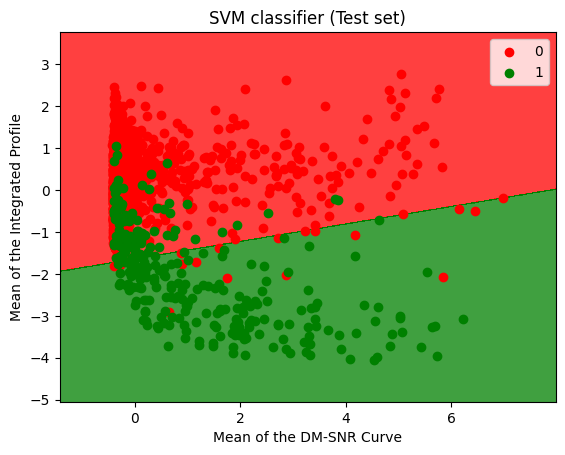

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming 'classifier' is your trained SVM classifier

# Plot decision boundaries
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

# Set plot labels and legend
plt.title('SVM classifier (Test set)')
plt.xlabel('Mean of the DM-SNR Curve')
plt.ylabel('Mean of the Integrated Profile')
plt.legend()

# Show the plot
plt.show()